# Atelier Données ouvertes

HNU3055 / HNU6055

**Équipe**  
Parham Aledavood  
Amélie Levasseur-R.

**Question**  
[EDIT] Voir s'il y a une différence dans la proportion de personnes aux soins intensifs dû à la COVID-19 dans 3 régions du Québec : une région très urbanisée (Montréal), une moyennement et une région plus éloignée.

Voir s'il y a une relation entre le taux de vaccination et les cas et hospitalisations de COVID-19, selon les régions administratives du Québec.

**Sources des données**  
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-de-la-vaccination#  
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-hospitalisations/resource/2d8bd4f8-4715-4f33-8cb4-eefcec60a4c9

**Documents explicatifs**  
listevariables_notesmetho_vaccination_20221107.pdf  
listevariables_notesmetho_hospit_20220621.pdf


**Problèmes rencontrés**

- Adapter le code trouvé à nos besoins spécifiques. Par exemple, nous avons eu de la difficulté à conserver les colonnes qui contiennent "Total" et aussi celle de la date. -> RÉGLÉ!

- Rendre analyse proportionnelle selon la population de chaque région. Doit trouver données sur la population par région.

- Doit revoir les données de vaccination conservées, utiliser les données par jour et non le cumul qui ne peut qu'augmenter. -> RÉGLÉ!

- Pas le même nombre de dates entre les deux jeux, même si la date de début et fin sont la même (681 observations hospitalisations et 755 observations vaccination).

- Régions des jeux sur la COVID ne sont pas exactement les mêmes que les régions administratives.

## Charger les librairies

In [142]:
import pandas as pd

## Téléchargement des données

In [143]:
url_vacc = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_Vaccination_RegionResidence.csv"
df_vacc = pd.read_csv(url_vacc)
# source code : https://datatofish.com/export-dataframe-to-csv/
df_vacc.to_csv(r'data/raw/COVID19_Qc_Vaccination_RegionResidence.csv')

url_hosp = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_HistoHospit.csv"
df_hosp = pd.read_csv(url_hosp)
df_hosp.to_csv(r'data/raw/COVID19_Qc_HistoHospit.csv')


In [144]:
df_vacc

date  RSS01_DOSE_Numero1_cumu  RSS02_DOSE_Numero1_cumu  \
0    2020-12-14                        1                        0   
1    2020-12-15                        1                        5   
2    2020-12-16                        1                        6   
3    2020-12-17                        5                        9   
4    2020-12-18                        5                       11   
..          ...                      ...                      ...   
769  2023-01-22                   176334                   251376   
770  2023-01-23                   176334                   251379   
771  2023-01-24                   176334                   251379   
772  2023-01-25                   176334                   251379   
773  2023-01-26                   176334                   251380   

     RSS03_DOSE_Numero1_cumu  RSS04_DOSE_Numero1_cumu  \
0                        145                        1   
1                        786                       11   
2                       1300                       16   
3                       1767                       23   
4                       2256                       29   
..                       ...                      ...   
769                   681702                   454823   
770                   681707                   454823   
771                   681711                   454823   
772                   681714                   454823   
773                   681716                   454825   

     RSS05_DOSE_Numero1_cumu  RSS06_DOSE_Numero1_cumu  \
0                          6                      148   
1                         12                      531   
2                         19                      860   
3                         22                     1160   
4                         35                     1326   
..                       ...                      ...   
769                   438802                  1742495   
770                   438805                  1742527   
771                   438808                  1742567   
772                   438808                  1742586   
773                   438810                  1742614   

     RSS07_DOSE_Numero1_cumu  RSS08_DOSE_Numero1_cumu  \
0                          2                        0   
1                          7                        1   
2                         19                        2   
3                         37                        3   
4                         47                        3   
..                       ...                      ...   
769                   349476                   127537   
770                   349480                   127537   
771                   349480                   127538   
772                   349485                   127539   
773                   349491                   127539   

     RSS09_DOSE_Numero1_cumu  ...  RSS13_DOSES_Total_jour  \
0                          0  ...                       2   
1                          1  ...                      27   
2                          1  ...                      19   
3                          5  ...                      22   
4                          5  ...                      17   
..                       ...  ...                     ...   
769                    78414  ...                      84   
770                    78414  ...                      62   
771                    78415  ...                      75   
772                    78415  ...                      49   
773                    78415  ...                     118   

     RSS14_DOSES_Total_jour  RSS15_DOSES_Total_jour  RSS16_DOSES_Total_jour  \
0                         0                       2                       1   
1                         4                      11                      56   
2                         6                      11                      48   
3                         9                      14                      44   

In [145]:
df_hosp

Date  ACT_Hsi_RSS01  ACT_Hsi_RSS02  ACT_Hsi_RSS03  ACT_Hsi_RSS04  \
0    2023-01-26             28             27            135            101   
1    2023-01-25             28             32            138            101   
2    2023-01-24             28             38            141             90   
3    2023-01-23             31             39            151             94   
4    2023-01-20             33             44            159             80   
..          ...            ...            ...            ...            ...   
943  2020-04-14              1              3             30             38   
944  2020-04-13              0              2             30             39   
945  2020-04-12              0              2             29             36   
946  2020-04-11              0              1             27             32   
947  2020-04-10              0              2             29             30   

     ACT_Hsi_RSS05  ACT_Hsi_RSS06  ACT_Hsi_RSS07  ACT_Hsi_RSS08  \
0              109            401            110             11   
1              114            416            111             12   
2              118            447            114             11   
3              125            431            115             13   
4              122            438            114             14   
..             ...            ...            ...            ...   
943             48            441              0              3   
944             43            420              1              4   
945             38            382              1              5   
946             41            365              0              5   
947             36            356              0              5   

     ACT_Hsi_RSS09  ...  ACT_Total_RSS10  ACT_Total_RSS11  ACT_Total_RSS12  \
0               38  ...                0               14               64   
1               41  ...                0               15               64   
2               42  ...                0               16               72   
3               44  ...                0               17               71   
4               46  ...                1               17               80   
..             ...  ...              ...              ...              ...   
943              0  ...                0                0                7   
944              0  ...                0                0                6   
945              0  ...                0                0                6   
946              0  ...                0                0                7   
947              0  ...                0                0                6   

     ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  ACT_Total_RSS16  \
0                 67               52              115              276   
1                 69               57              115              291   
2                 66               61              124              295   
3                 67               65              121              299   
4                 63               77              132              306   
..               ...              ...              ...              ...   
943               63               35               18               89   
944               61               37               17               93   
945               56               37               12               85   
946               48               36               12               81   
947               45               35               13               71   

     ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
0                  1                0             1569  
1                  1                0             1631  
2                  1                0             1688  
3                  1                0             1711  
4                  0                0             1758  
..               ...              ...              ...  
943                1

## Nettoyage et manipulations des données

### Hospitalisations

In [146]:
# uniformiser le nom de colonne "date" qui avait une majuscule dans ce jeu
df_hosp = df_hosp.rename(columns = {"Date": "date"})

# éliminer les données d'avant 2021
df_hosp = df_hosp[df_hosp["date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_hosp = df_hosp.sort_values("date", ascending=True)

# conserver seulement les colonnes total, en plus de la date
# source code : https://stackoverflow.com/questions/69387240/how-to-drop-columns-which-contains-specific-characters-except-one-column
df_hosp_total = df_hosp.loc[:, df_hosp.columns.str.contains("Total") | (df_hosp.columns == "date")]

df_hosp_total.to_csv(r'data/processed/COVID19_Qc_HistoHospit.csv')
df_hosp_total


# conserver seulement les colonnes soins intensifs, en plus de la date
df_hosp_si = df_hosp.loc[:, df_hosp.columns.str.contains("_Si") | (df_hosp.columns == "date")]
df_hosp_si


date  ACT_Si_RSS01  ACT_Si_RSS02  ACT_Si_RSS03  ACT_Si_RSS04  \
681  2021-01-01             1             6            14             6   
680  2021-01-02             0             6            15             6   
679  2021-01-03             0             8            15             5   
678  2021-01-04             0             6            15             5   
677  2021-01-05             0             7            17             4   
..          ...           ...           ...           ...           ...   
4    2023-01-20             1             1             6             3   
3    2023-01-23             1             1             4             3   
2    2023-01-24             0             2             4             3   
1    2023-01-25             1             2             3             5   
0    2023-01-26             0             2             2             3   

     ACT_Si_RSS05  ACT_Si_RSS06  ACT_Si_RSS07  ACT_Si_RSS08  ACT_Si_RSS09  \
681             6            85             4             0             0   
680             6            92             4             0             0   
679            12            92             4             0             0   
678            13            97             4             0             0   
677             8           104             4             0             0   
..            ...           ...           ...           ...           ...   
4               0            21             0             0             0   
3               0            18             0             0             0   
2               0            15             0             0             0   
1               0            15             0             0             0   
0               0            13             0             0             0   

     ACT_Si_RSS10  ACT_Si_RSS11  ACT_Si_RSS12  ACT_Si_RSS13  ACT_Si_RSS14  \
681             0             0             7             7             5   
680             0             0             6             7             6   
679             0             0             7             6             8   
678             0             0             8             7             8   
677             0             0            10             7            11   
..            ...           ...           ...           ...           ...   
4               0             0             4             0             0   
3               0             0             5             0             0   
2               0             0             5             0             0   
1               0             0             4             0             0   
0               0             0             4             0             0   

     ACT_Si_RSS15  ACT_Si_RSS16  ACT_Si_RSS17  ACT_Si_RSS18  ACT_Si_RSS99  
681             8            17             0             0           166  
680             7            24             0             0           179  
679             7            24             0             0           188  
678             7            24             0             0           194  
677             4            26             0             0           202  
..            ...           ...           ...           ...           ...  
4               3             3             0             0            42  
3               2             3             0             0            37  
2               2             3             0             0            34  
1               1             4             0             0            35  
0               1             2             0             0            27  

[682 rows x 20 columns]

### Vaccination

In [147]:
# éliminer les données d'avant 2021
df_vacc = df_vacc[df_vacc["date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_vacc = df_vacc.sort_values("date", ascending=True)

# conserver seulement les données par jour, et la date
df_vacc_jour = df_vacc.loc[:, df_vacc.columns.str.contains("jour") | (df_vacc.columns == "date")]
df_vacc_jour = df_vacc_jour.drop(columns=["RSSND_DOSES_Total_jour", "RSSHQ_DOSES_Total_jour", "RSSAL_DOSES_Total_jour"])

df_vacc_jour.to_csv(r'data/processed/COVID19_Qc_Vaccination_RegionResidence.csv')
df_vacc_jour

date  RSS01_DOSE_Numero1_jour  RSS02_DOSE_Numero1_jour  \
18   2021-01-01                        0                        0   
19   2021-01-02                        0                      148   
20   2021-01-03                        3                      400   
21   2021-01-04                        5                      486   
22   2021-01-05                       12                      211   
..          ...                      ...                      ...   
769  2023-01-22                        0                        0   
770  2023-01-23                        0                        3   
771  2023-01-24                        0                        0   
772  2023-01-25                        0                        0   
773  2023-01-26                        0                        1   

     RSS03_DOSE_Numero1_jour  RSS04_DOSE_Numero1_jour  \
18                         2                        0   
19                         4                        9   
20                       304                       12   
21                       467                      197   
22                       881                      525   
..                       ...                      ...   
769                        2                        0   
770                        5                        0   
771                        4                        0   
772                        3                        0   
773                        2                        2   

     RSS05_DOSE_Numero1_jour  RSS06_DOSE_Numero1_jour  \
18                         1                       32   
19                       183                       37   
20                       171                       45   
21                        11                      634   
22                        87                     1988   
..                       ...                      ...   
769                        0                       12   
770                        3                       32   
771                        3                       40   
772                        0                       19   
773                        2                       28   

     RSS07_DOSE_Numero1_jour  RSS08_DOSE_Numero1_jour  \
18                        34                        0   
19                        36                        0   
20                        40                        0   
21                       136                        4   
22                       135                      121   
..                       ...                      ...   
769                        0                        0   
770                        4                        0   
771                        0                        1   
772                        5                        1   
773                        6                        0   

     RSS09_DOSE_Numero1_jour  ...  RSS10_DOSES_Total_jour  \
18                         0  ...                       0   
19                         1  ...                       0   
20                         2  ...                       0   
21                         2  ...                       0   
22                         2  ...                       2   
..                       ...  ...                     ...   
769                        0  ...                       0   
770                        0  ...                       1   
771                        1  ...                       2   
772                        0  ...                       5   
773                        0  ...                      19   

     RSS11_DOSES_Total_jour  RSS12_DOSES_Total_jour  RSS13_DOSES_Total_jour  \
18                        0                       0                       1   
19                        1                       3                      13   
20                        0                     347                      13   
21                        4                     103                     132   

## Fusionner les jeux de données 

Parce que le jeu sur la vaccination ne contient pas toutes les dates, entre autres.

In [148]:
data = pd.merge(df_vacc_jour, df_hosp_total, how='left', on="date")

data_hosp = pd.merge(df_hosp_si, df_hosp_total, how='left', on="date")

### Régions

RSS06 : Montréal  
RSS14 : Lanaudière  
RSS11 : Gaspésie

In [149]:
# conserver seulement les colonnes de la région, en plus de la date
data_hosp_06 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS06") | (data_hosp.columns == "date")]
data_hosp_14 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS14") | (data_hosp.columns == "date")]
data_hosp_11 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS11") | (data_hosp.columns == "date")]


### Ajouter proportions soins intensifs vs total hospitalisations

In [150]:
data_hosp_06 = data_hosp_06.assign(Proportion_Si = data_hosp_06["ACT_Si_RSS06"] / data_hosp_06["ACT_Total_RSS06"] * 100)
data_hosp_14 = data_hosp_14.assign(Proportion_Si = data_hosp_14["ACT_Si_RSS14"] / data_hosp_14["ACT_Total_RSS14"] * 100)
data_hosp_11 = data_hosp_11.assign(Proportion_Si = data_hosp_11["ACT_Si_RSS11"] / data_hosp_11["ACT_Total_RSS11"] * 100)
data_hosp_06

date  ACT_Si_RSS06  ACT_Total_RSS06  Proportion_Si
0    2021-01-01            85              508      16.732283
1    2021-01-02            92              570      16.140351
2    2021-01-03            92              593      15.514334
3    2021-01-04            97              631      15.372425
4    2021-01-05           104              662      15.709970
..          ...           ...              ...            ...
677  2023-01-20            21              459       4.575163
678  2023-01-23            18              449       4.008909
679  2023-01-24            15              462       3.246753
680  2023-01-25            15              431       3.480278
681  2023-01-26            13              414       3.140097

[682 rows x 4 columns]

### Population

Source : Banque de données des statistiques officielles sur le Québec

In [151]:
pop2021_06 = 2024806 / 100000
pop2021_14 = 535132 / 100000
pop2021_11 = 92015 / 100000

data_hosp_06 = data_hosp_06.assign(Proportion_Pop_Si = data_hosp_06["ACT_Si_RSS06"] / pop2021_06)
data_hosp_11 = data_hosp_11.assign(Proportion_Pop_Si = data_hosp_11["ACT_Si_RSS11"] / pop2021_11)
data_hosp_14 = data_hosp_14.assign(Proportion_Pop_Si = data_hosp_14["ACT_Si_RSS14"] / pop2021_14)

data_hosp_06 = data_hosp_06.assign(Proportion_Pop_Total = data_hosp_06["ACT_Total_RSS06"] / pop2021_06)
data_hosp_11 = data_hosp_11.assign(Proportion_Pop_Total = data_hosp_11["ACT_Total_RSS11"] / pop2021_11)
data_hosp_14 = data_hosp_14.assign(Proportion_Pop_Total = data_hosp_14["ACT_Total_RSS14"] / pop2021_14)
data_hosp_14

date  ACT_Si_RSS14  ACT_Total_RSS14  Proportion_Si  \
0    2021-01-01             5               25      20.000000   
1    2021-01-02             6               32      18.750000   
2    2021-01-03             8               37      21.621622   
3    2021-01-04             8               39      20.512821   
4    2021-01-05            11               41      26.829268   
..          ...           ...              ...            ...   
677  2023-01-20             0               77       0.000000   
678  2023-01-23             0               65       0.000000   
679  2023-01-24             0               61       0.000000   
680  2023-01-25             0               57       0.000000   
681  2023-01-26             0               52       0.000000   

     Proportion_Pop_Si  Proportion_Pop_Total  
0             0.934349              4.671745  
1             1.121219              5.979833  
2             1.494958              6.914182  
3             1.494958              7.287921  
4             2.055568              7.661661  
..                 ...                   ...  
677           0.000000             14.388973  
678           0.000000             12.146536  
679           0.000000             11.399057  
680           0.000000             10.651578  
681           0.000000              9.717229  

[682 rows x 6 columns]

## Visualisations

In [152]:
# sources code : 
# https://matplotlib.org/stable/tutorials/introductory/customizing.htmlimport matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

# paramètres par défaut pour tous nos graphiques
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.titleweight"] = "bold"
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
mpl.rcParams["lines.linewidth"] = 1
mpl.rcParams["xtick.major.size"] = 1
#plt.rcParams.keys()
#mpl.rcParams.keys()

<AxesSubplot:title={'center':'Nombre de vaccins administrés (Québec)'}, xlabel='date'>

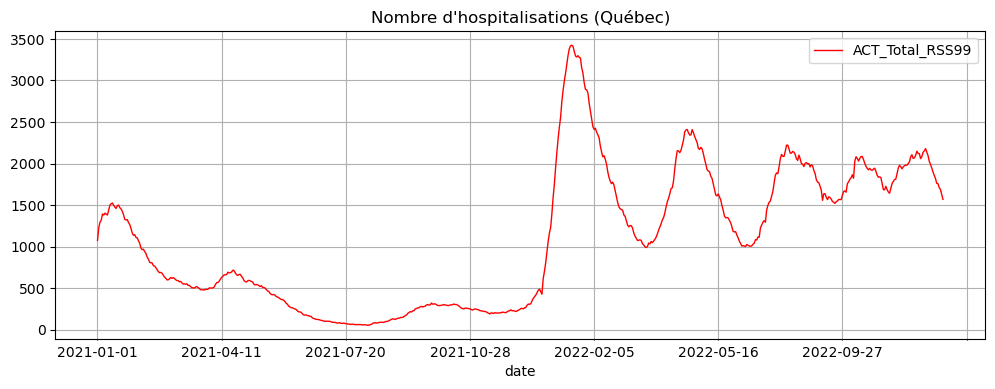

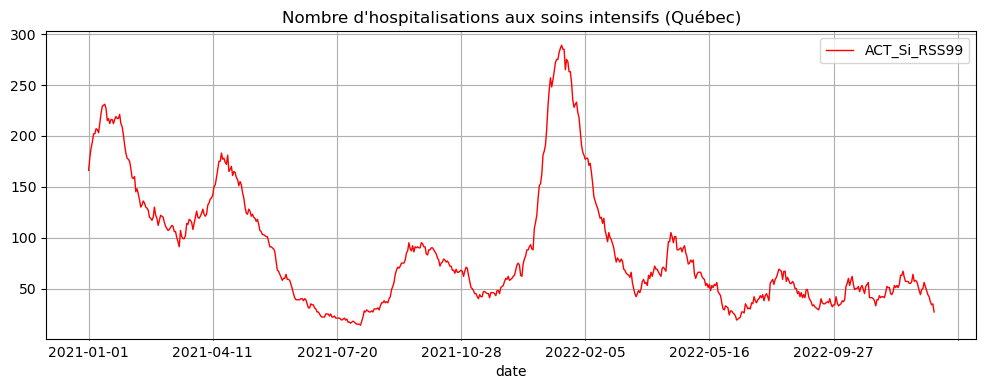

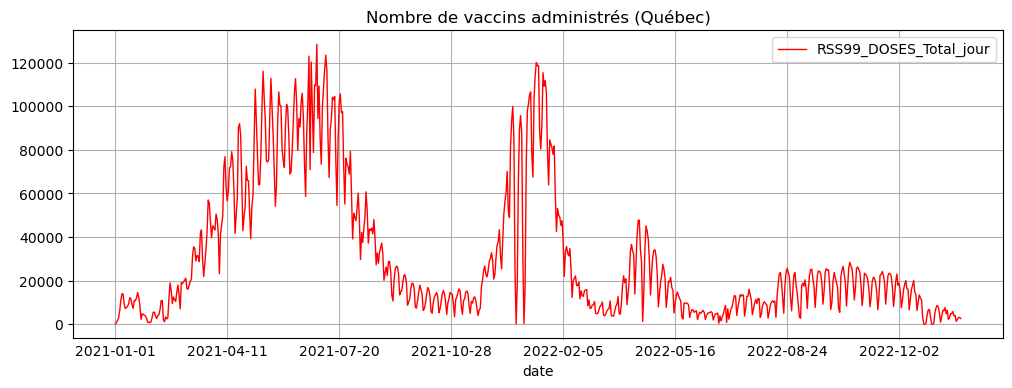

In [153]:
df_hosp_total.plot(x= "date", y="ACT_Total_RSS99", title="Nombre d'hospitalisations (Québec)")
df_hosp_si.plot(x= "date", y="ACT_Si_RSS99", title="Nombre d'hospitalisations aux soins intensifs (Québec)")

df_vacc_jour.plot(x= "date", y="RSS99_DOSES_Total_jour", title="Nombre de vaccins administrés (Québec)")


### Proportion de personnes aux soins intensifs

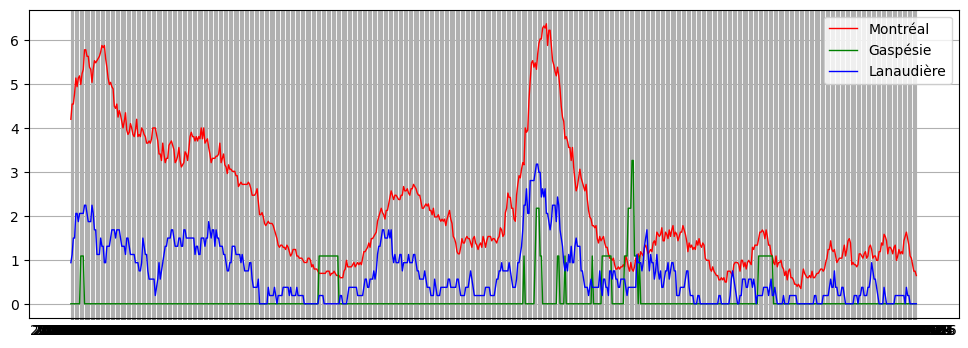

In [154]:
#data_hosp_11.plot(x= "date", y="Proportion_Pop_Si", title="Nombre de personnes aux soins intensifs (par 100 000 habitants)")

date = data_hosp_06["date"]
RSS06 = data_hosp_06["Proportion_Pop_Si"]
RSS11 = data_hosp_11["Proportion_Pop_Si"]
RSS14 = data_hosp_14["Proportion_Pop_Si"]

plt.plot(date, RSS06, label="Montréal")
plt.plot(date, RSS11, label="Gaspésie")
plt.plot(date, RSS14, label="Lanaudière")

plt.legend()
plt.show()


### Proportion de personnes hospitalisées

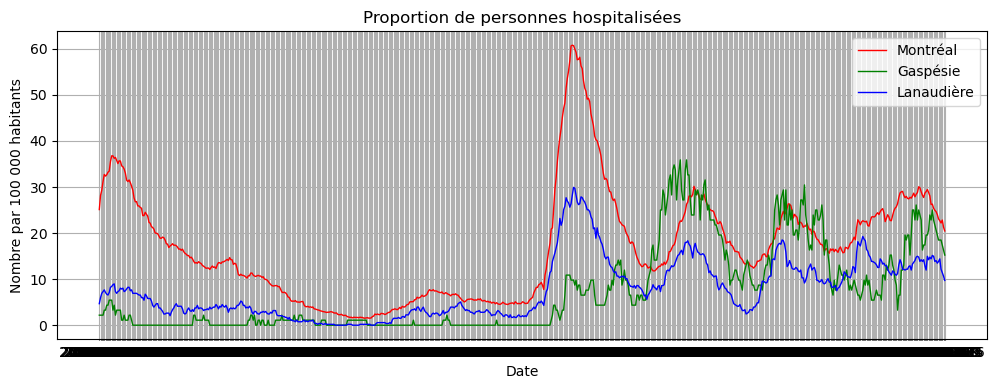

In [164]:
date = data_hosp_06["date"]
RSS06t = data_hosp_06["Proportion_Pop_Total"]
RSS11t = data_hosp_11["Proportion_Pop_Total"]
RSS14t = data_hosp_14["Proportion_Pop_Total"]

plt.plot(date, RSS06t, label="Montréal")
plt.plot(date, RSS11t, label="Gaspésie")
plt.plot(date, RSS14t, label="Lanaudière")

plt.xlabel("Date")
plt.ylabel("Nombre par 100 000 habitants")
plt.title("Proportion de personnes hospitalisées")
plt.legend()
plt.show()

### Proportion de personnes hospitalisées aux soins intensifs

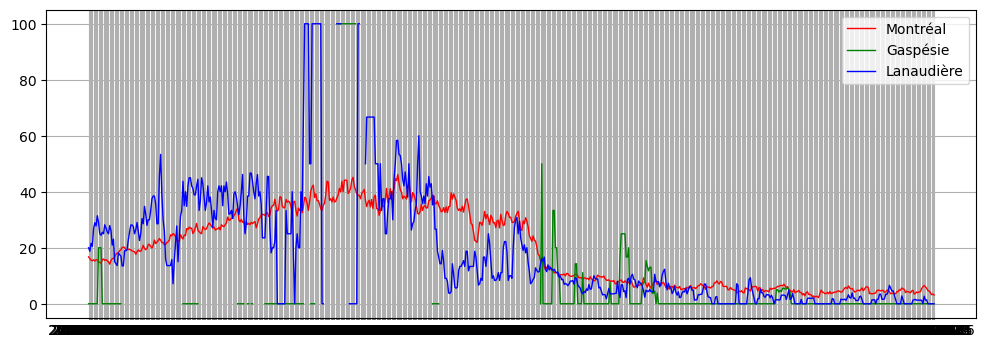

In [163]:
date = data_hosp_06["date"]
RSS06tsi = data_hosp_06["Proportion_Si"]
RSS11tsi = data_hosp_11["Proportion_Si"]
RSS14tsi = data_hosp_14["Proportion_Si"]

plt.plot(date, RSS06tsi, label="Montréal")
plt.plot(date, RSS11tsi, label="Gaspésie")
plt.plot(date, RSS14tsi, label="Lanaudière")

plt.legend()
plt.show()

### Points à travailler

soins intensifs
morts
comparaison avec permissions en cours, déconfinement
hospitalisation personnes vaccinées ou pas?
date élection, événements
cumul vaccination
par semaine
question plus précise
loufoque : comparaison avec autre chose complètement

In [156]:
date = data["date"]
hosp = data["ACT_Total_RSS99"]
#vacc = data["RSS99_DOSES_Total_jour"]
si = data["ACT_Si_RSS99"]

plt.plot(date, hosp, label="Nombre d'hospitalisations")
plt.plot(date, si, label="Nombre aux soins intensifs")

plt.show()

KeyError: 'ACT_Si_RSS99'